In [5]:
!pip install pandas
!pip install pandas-profiling
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
import collections



  Using cached pandas_profiling-2.9.0-py2.py3-none-any.whl (258 kB)
  Using cached visions-0.5.0-py3-none-any.whl (64 kB)
  Using cached missingno-0.4.2-py3-none-any.whl (9.7 kB)
  Using cached confuse-1.3.0-py2.py3-none-any.whl (64 kB)
  Using cached phik-0.10.0-py3-none-any.whl (599 kB)
Processing /Users/eunbeejang/Library/Caches/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243/htmlmin-0.1.12-py3-none-any.whl
Processing /Users/eunbeejang/Library/Caches/pip/wheels/cc/57/bb/6f9f52a6d8187b8f806210e3378837aa4dc6219cd64cb99846/ImageHash-4.1.0-py2.py3-none-any.whl
Processing /Users/eunbeejang/Library/Caches/pip/wheels/13/90/db/290ab3a34f2ef0b5a0f89235dc2d40fea83e77de84ed2dc05c/PyYAML-5.3.1-cp38-cp38-macosx_10_9_x86_64.whl


In [9]:
cols = ['age', 'workclass', 'fnlwgt', 'education',
        'education-num', 'marital-status', 'occupation',
        'relationship', 'race', 'sex', 'capital-gain',
        'capital-loss', 'hours-per-week', 'native-country', 'y']


In [10]:
train_path = "adult.data"
train_df = pd.read_csv(train_path, sep=',', names=cols)

In [11]:
test_path = "adult.test"
test_df = pd.read_csv(test_path, sep=',', names=cols)

In [12]:
from pandas_profiling import ProfileReport
prof = ProfileReport(train_df)
prof.to_file(output_file='adult_profile.html')

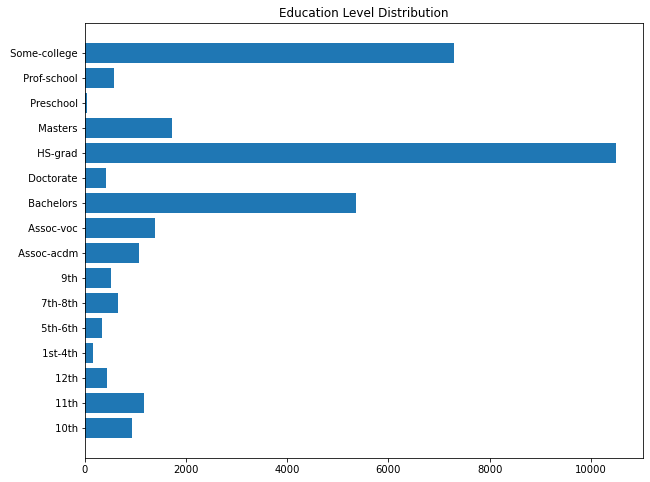

In [16]:
pos_df = train_df[train_df['y'] == '<=50K']
neg_df = train_df[train_df['y'] == '>50K']

all_education = dict(train_df.education.value_counts())
all_education = collections.OrderedDict(sorted(all_education.items()))

pos_education = dict(pos_df.education.value_counts())
pos_education = collections.OrderedDict(sorted(pos_education.items()))


neg_education = dict(neg_df.education.value_counts())
neg_education = collections.OrderedDict(sorted(neg_education.items()))



x_pos = [i for i, _ in enumerate(all_education.keys())]

plt.figure(figsize=(10,8))
plt.barh(x_pos, all_education.values())
plt.title("Education Level Distribution")

plt.yticks(x_pos, all_education.keys())

plt.show()